# Setup

~~Create environment~~\
~~open file and create dataframe~~\
~~remove outliers using turkey outliers~~

# Figures and Table to Replicate

Figure 1\
Figure 2\
~~Figure 3~~\
Table 2\
Table 3\
~~Table 4~~\
Table 5\
Table 6\
Table 7

In [52]:
import pandas as pd
import math
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import spearmanr

In [66]:
# Reading input file and creating dataframe for analysis

df = pd.read_csv("/Users/admin/Desktop/SENG-480B-Final-Project-1/Input files/full.csv", sep=",")   
df["sloc"]=df['Insertions']+df['Deletions']
df.drop(df.loc[df['Language']=='Javascript'].index, inplace=True)
df.head()

,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,sloc
0,C,ARMmbed/DAPLink,1,2015-06-26 19:25:11,2015-06-26 19:25:50,0,2,86,164,250
1,C,ARMmbed/DAPLink,10,2015-09-29 23:33:53,2015-09-30 19:38:09,1204,5,204,0,204
2,C,ARMmbed/DAPLink,104,2016-05-19 01:48:57,2016-05-19 18:09:56,980,1,1,1,2
3,C,ARMmbed/DAPLink,108,2016-06-02 01:26:45,2016-06-02 16:23:28,896,2,15,0,15
4,C,ARMmbed/DAPLink,110,2016-06-14 20:27:04,2016-07-20 13:58:13,51451,14,91,10,101


In [54]:
display(df)

,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,sloc
0,C,ARMmbed/DAPLink,1,2015-06-26 19:25:11,2015-06-26 19:25:50,0,2,86,164,250
1,C,ARMmbed/DAPLink,10,2015-09-29 23:33:53,2015-09-30 19:38:09,1204,5,204,0,204
2,C,ARMmbed/DAPLink,104,2016-05-19 01:48:57,2016-05-19 18:09:56,980,1,1,1,2
3,C,ARMmbed/DAPLink,108,2016-06-02 01:26:45,2016-06-02 16:23:28,896,2,15,0,15
4,C,ARMmbed/DAPLink,110,2016-06-14 20:27:04,2016-07-20 13:58:13,51451,14,91,10,101
...,...,...,...,...,...,...,...,...,...,...
663276,TypeScript,yzhang-gh/vscode-markdown,890,2021-02-01 03:24:56,2021-02-01 06:01:20,156,8,342,159,501
663277,TypeScript,yzhang-gh/vscode-markdown,897,2021-02-10 15:50:03,2021-02-12 04:57:00,2226,11,1106,110,1216
663278,TypeScript,yzhang-gh/vscode-markdown,898,2021-02-10 22:14:42,2021-02-15 18:20:10,6965,1,112,39,151
663279,TypeScript,yzhang-gh/vscode-markdown,909,2021-03-05 21:21:14,2021-03-06 02:51:52,330,1,45,29,74


In [67]:
# Using turkey outlier to drop outliers in the data. This is the same method as the original study for continuity

def turkey_outlier(df, column, whisker_width=1):
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     

# Example for whiskers = 1.5, as requested by the OP
table3=df.copy()
display(df)
display(df.describe())
df = turkey_outlier(df, 'Merge time minutes', whisker_width=1)
df = turkey_outlier(df, 'sloc', whisker_width=1)
display(df)
df.describe()

,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,sloc
0,C,ARMmbed/DAPLink,1,2015-06-26 19:25:11,2015-06-26 19:25:50,0,2,86,164,250
1,C,ARMmbed/DAPLink,10,2015-09-29 23:33:53,2015-09-30 19:38:09,1204,5,204,0,204
2,C,ARMmbed/DAPLink,104,2016-05-19 01:48:57,2016-05-19 18:09:56,980,1,1,1,2
3,C,ARMmbed/DAPLink,108,2016-06-02 01:26:45,2016-06-02 16:23:28,896,2,15,0,15
4,C,ARMmbed/DAPLink,110,2016-06-14 20:27:04,2016-07-20 13:58:13,51451,14,91,10,101
...,...,...,...,...,...,...,...,...,...,...
663276,TypeScript,yzhang-gh/vscode-markdown,890,2021-02-01 03:24:56,2021-02-01 06:01:20,156,8,342,159,501
663277,TypeScript,yzhang-gh/vscode-markdown,897,2021-02-10 15:50:03,2021-02-12 04:57:00,2226,11,1106,110,1216
663278,TypeScript,yzhang-gh/vscode-markdown,898,2021-02-10 22:14:42,2021-02-15 18:20:10,6965,1,112,39,151
663279,TypeScript,yzhang-gh/vscode-markdown,909,2021-03-05 21:21:14,2021-03-06 02:51:52,330,1,45,29,74


,PR ID,Merge time minutes,Files changed,Insertions,Deletions,sloc
count,663143.000000,6.631430e+05,663143.000000,6.631430e+05,6.631430e+05,6.631430e+05
mean,3790.945259,1.556923e+04,11.244747,7.990855e+02,4.907020e+02,1.289787e+03
std,10308.934985,7.601863e+04,265.200147,3.267782e+04,1.909849e+04,3.921843e+04
min,1.000000,-4.500000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,334.000000,5.100000e+01,1.000000,3.000000e+00,1.000000e+00,5.000000e+00
50%,1128.000000,7.200000e+02,2.000000,1.400000e+01,4.000000e+00,2.200000e+01
75%,3270.000000,5.354000e+03,5.000000,7.100000e+01,2.200000e+01,1.070000e+02
max,167053.000000,3.792558e+06,84350.000000,1.406023e+07,6.644953e+06,1.406026e+07


,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,sloc
2,C,ARMmbed/DAPLink,104,2016-05-19 01:48:57,2016-05-19 18:09:56,980,1,1,1,2
3,C,ARMmbed/DAPLink,108,2016-06-02 01:26:45,2016-06-02 16:23:28,896,2,15,0,15
8,C,ARMmbed/DAPLink,120,2016-07-08 23:47:22,2016-07-10 21:40:21,2752,3,17,0,17
10,C,ARMmbed/DAPLink,122,2016-07-11 20:31:10,2016-07-11 23:15:21,164,3,7,7,14
11,C,ARMmbed/DAPLink,124,2016-07-13 15:37:51,2016-07-13 20:37:38,299,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
663272,TypeScript,yzhang-gh/vscode-markdown,865,2020-12-11 02:58:13,2020-12-11 03:31:10,32,1,3,3,6
663273,TypeScript,yzhang-gh/vscode-markdown,869,2020-12-16 17:48:52,2020-12-17 13:42:16,1193,1,69,46,115
663278,TypeScript,yzhang-gh/vscode-markdown,898,2021-02-10 22:14:42,2021-02-15 18:20:10,6965,1,112,39,151
663279,TypeScript,yzhang-gh/vscode-markdown,909,2021-03-05 21:21:14,2021-03-06 02:51:52,330,1,45,29,74


,PR ID,Merge time minutes,Files changed,Insertions,Deletions,sloc
count,457534.000000,457534.000000,457534.000000,457534.000000,457534.000000,457534.000000
mean,4016.506651,1388.986117,2.822780,21.269986,9.569525,30.839511
std,11259.155562,2297.364959,17.959834,31.053345,17.304790,40.642861
min,1.000000,-45.000000,0.000000,0.000000,0.000000,0.000000
25%,331.000000,28.000000,1.000000,2.000000,1.000000,4.000000
50%,1126.000000,271.000000,1.000000,7.000000,3.000000,12.000000
75%,3330.000000,1489.000000,3.000000,27.000000,10.000000,41.000000
max,167053.000000,10657.000000,6632.000000,185.000000,185.000000,185.000000


In [56]:
# Table 2: Distribution of outliers excluded based on SLOC. Random sample of N = 100.
#manually done 


In [57]:
# Table 3: Time-to-merge (hours) and SLOC per pull request before and after removing the outliers using Tukey 1.5×𝐼𝑄𝑅 fence. N = total number, M = mean, Mdn = median, SD = standard deviation.
#before filtering dataset
day=table3["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
pull= table3.copy()
pull["Merge time minutes"]=day
pull=pull.drop(columns=["PR ID", "Files changed","Insertions","Deletions"])
before=pull.agg({ 'Merge time minutes': ['count','mean','median', 'std'], 'sloc': ['mean','median', 'std']}).rename(columns={"Merge time minutes":"Merge time hours","count":"N"})

#filter outliers
table3 = turkey_outlier(table3, 'Merge time minutes', whisker_width=1)
table3 = turkey_outlier(table3, 'sloc', whisker_width=1)

#after filtering dataset
day=df["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
pull=pd.DataFrame()
pull= table3.copy()
pull["Merge time minutes"]=day
pull=pull.drop(columns=["PR ID", "Files changed","Insertions","Deletions"])
after=pull.agg({ 'Merge time minutes': ['count','mean','median', 'std'], 'sloc': ['mean','median', 'std']}).rename(columns={"Merge time minutes":"Merge time hours","count":"N"})

#combining the before and after metrics
combine=pd.concat([before,after], axis=1)
df1 = pd.concat([before], keys=["before"], names=['type'],axis=1)
df2 = pd.concat([after], keys=["after"], names=['type'],axis=1)
combine=pd.concat([df1,df2], axis=1)
display(combine)

type             before                          after           
       Merge time hours          sloc Merge time hours       sloc
count     663281.000000           NaN    457631.000000        NaN
mean         260.045025   1289.616871        23.675627  30.838752
median        12.000000     22.000000         5.000000  12.000000
std         1267.004961  39214.369526        38.273670  40.642145

In [81]:
# Table 4 Time-to-merge (hours) and SLOC per pull request
# N = total number, M = mean, Mdn = median, SD = standard deviation.


day=df["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
pull=pd.DataFrame()
pull= df.copy()
pull["Merge time minutes"]=day
pull=pull.drop(columns=["PR ID", "Files changed","Insertions","Deletions"])
pull=pull.groupby(["Language"]).agg({ 'Merge time minutes': ['count','mean','median', 'std'], 'sloc': ['mean','median', 'std']}).rename(columns={"Merge time minutes":"Merge time hours","count":"N"})
display(pull)

Merge time hours                                    sloc         \
                          N       mean median        std       mean median   
Language                                                                     
C                     15333  29.466706   10.0  41.794628  30.766386   12.0   
CPP                   29014  28.037775    9.0  40.827948  33.467809   14.0   
CSharp                29681  22.872781    4.0  37.853494  35.231866   15.0   
Go                    38235  23.615876    5.0  38.434256  32.659553   14.0   
JavaScript            61624  24.256053    5.0  38.761938  28.700717   11.0   
PHP                   93657  22.482772    4.0  37.757084  28.983493   11.0   
Python                61248  24.794328    6.0  38.575084  31.166405   12.0   
Ruby                  38011  24.592434    6.0  38.525137  26.907579   10.0   
TypeScript            90731  21.279486    4.0  36.436975  32.602639   14.0   

                       
                  std  
Language               
C           40.994543  
CPP         42.552379  
CSharp      43.637011  
Go          41.569653  
JavaScript  39.116570  
PHP         39.310548  
Python      41.019770  
Ruby        37.683729  
TypeScript  41.525944

In [87]:
# Table 5: Spearman correlation coefficient 𝑟𝑠 (𝑝 < .001) between time-to-merge (hours) and total SLOC. N = total number.

temp = df.copy()
temp = temp[['Language', 'Merge time minutes', 'sloc']]
temp['Merge time minutes'] = temp['Merge time minutes']/60
# ttm.rename(columns = {"Merge time minutes": "Merge time hours"})

temp = temp.groupby(["Language"]).agg(N = ('Language','count'))
#.corr(method='spearman').unstack()
print(temp)



#temp = temp.groupby(["Language"]).agg({"Merge time minutes": ['sum'], "sloc": ['sum']}).corr(method='spearman')
#print(temp)

#temp = temp[['Merge time minutes', 'sloc']]
#print(temp)

#print(temp.corr(method='spearman'))



#t5 = temp.groupby('Language')[['Merge time minutes', 'sloc']].corr(method='spearman').unstack()
#print(t5)


sloc = df[['Language', 'sloc']]


# #coef, p = spearmanr(ttm, sloc)
#print('Spearmans correlation coefficient: %.3f' % coef)

#alpha = 0.001
#if p<alpha:
   # print("good")

t5 = pd.DataFrame()
t5 = df.copy()
t5 = t5.groupby('Language')[['Merge time minutes', 'sloc']].corr(method='spearman').unstack().iloc[:,1]

#t5 = t5.groupby(["Language"]).agg({"Language":['count'], ['Merge time minutes']:})
#t5 = t5.to_frame()
#t5 = t5.rename(columns={'':'rs'}, inplace=True)
print(t5)
#list(t5.columns)
t5=temp.merge(t5, on="Language")
t5.columns = ["N", "rs"]
t5

                N
Language         
C           15333
CPP         29014
CSharp      29681
Go          38235
JavaScript  61624
PHP         93657
Python      61248
Ruby        38011
TypeScript  90731
Language
C             0.134918
CPP           0.158962
CSharp        0.076714
Go            0.108545
JavaScript    0.077014
PHP           0.079375
Python        0.164347
Ruby          0.166529
TypeScript    0.055927
Name: (Merge time minutes, sloc), dtype: float64


/var/folders/fr/qb0slnsj0vq8_c30p6gpnnbw0000gn/T/ipykernel_27589/2403032616.py:47: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  t5=temp.merge(t5, on="Language")


,N,rs
Language,,
C,15333,0.134918
CPP,29014,0.158962
CSharp,29681,0.076714
Go,38235,0.108545
JavaScript,61624,0.077014
PHP,93657,0.079375
Python,61248,0.164347
Ruby,38011,0.166529
TypeScript,90731,0.055927


In [102]:
# Table 6: Spearman correlation coefficient 𝑟𝑠 (𝑝 < .001) between time-to-merge in hours and total SLOC in a pull request by pull request creation day. N = total number
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
t6=df.copy()

t6['Merge time minutes'] = t6['Merge time minutes']/60
t6['create_date'] = pd.to_datetime(t6['Created At']).dt.date
t6['create_date'] = pd.to_datetime(t6['create_date'])
t6['day-of-week'] = t6['create_date'].dt.dayofweek
t6.sort_values(['day-of-week'],ascending=True)
t6['day-of-week']=t6['day-of-week'].map(dayOfWeek)

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
groups = t6.groupby(["day-of-week"]).agg(N = ('Language','count'))
t6 = t6.groupby(['day-of-week'])[['Merge time minutes', 'sloc']].corr(method='spearman').unstack().iloc[:,1]
print(t6)
display(groups)
t6=groups.merge(t6, on="day-of-week")
t6.columns = ["N", "rs"]
t6

day-of-week
Friday       0.120187
Monday       0.102287
Saturday     0.057740
Sunday       0.055419
Thursday     0.113417
Tuesday      0.109566
Wednesday    0.109318
Name: (Merge time minutes, sloc), dtype: float64


,N
day-of-week,
Friday,71375
Monday,76707
Saturday,40282
Sunday,37684
Thursday,75367
Tuesday,78063
Wednesday,78056


/var/folders/fr/qb0slnsj0vq8_c30p6gpnnbw0000gn/T/ipykernel_27589/3060367112.py:17: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  t6=groups.merge(t6, on="day-of-week")


,N,rs
day-of-week,,
Friday,71375,0.120187
Monday,76707,0.102287
Saturday,40282,0.057740
Sunday,37684,0.055419
Thursday,75367,0.113417
Tuesday,78063,0.109566
Wednesday,78056,0.109318


Text(0, 0.5, '% of total pull requests')

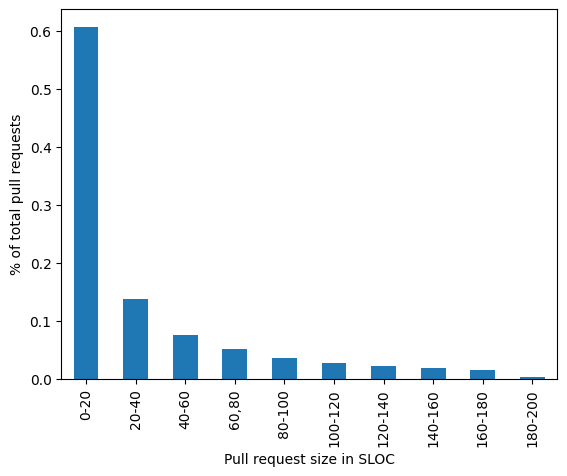

In [71]:
# Figure 1: A barplot of pull request sizes
bins = [0, 20, 40, 60, 80,100,120,140,160,180,200]
fig1 = df.copy()
fig1['Pull request size in SLOC'] = pd.cut(fig1['sloc'], [0, 20, 40, 60, 80,100,120,140,160,180,200], labels=['0-20',"20-40", '40-60',"60,80","80-100",'100-120' ,'120-140', "140-160", '160-180',"180-200"])
total=len(fig1)
groups = fig1.groupby(["Pull request size in SLOC"]).size()/total
ax=groups.plot.bar()
ax.set_ylabel("% of total pull requests")

Text(0, 0.5, '% of total pull requests')

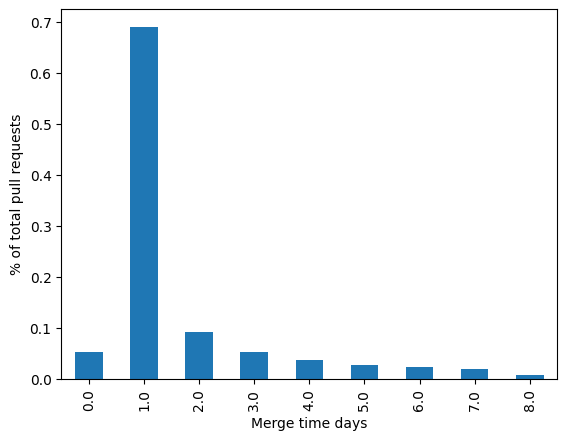

In [72]:
#Figure 2: A barplot of time-to-merge for pull requests.
fig2 = df.copy()
day=fig2["Merge time minutes"]/1440
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
fig2["Merge time days"]=day
total=len(fig2)
fig2.groupby(["Merge time days"])
groups = fig2.groupby(["Merge time days"]).size()/total
ax=groups.plot.bar()
ax.set_ylabel("% of total pull requests")

Text(0, 0.5, 'Merge time in hours')

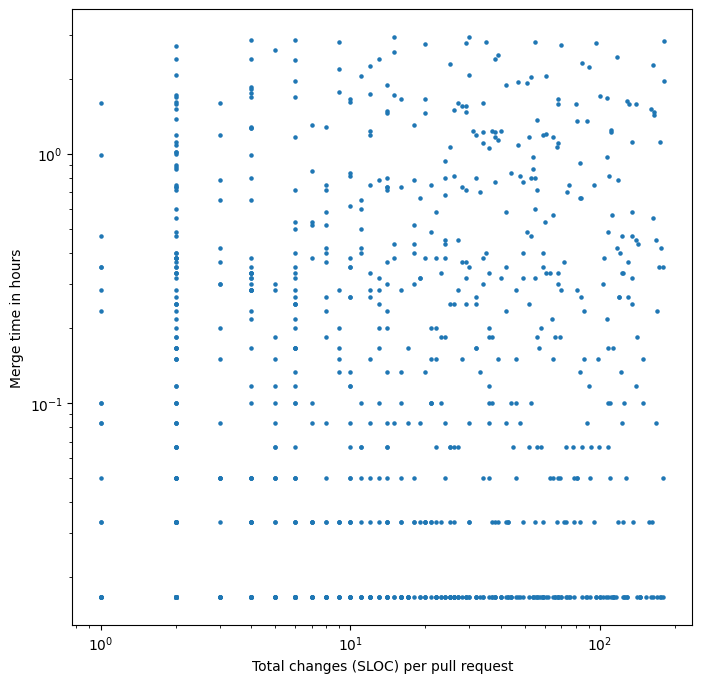

In [73]:
# Figure 3
# A scatter plot of pull request sizes and time-to-merge. Random sample of 𝑁 = 1,000 pull requests.
sloc=df.sample(n=1000,random_state=3)
day=sloc["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
sloc["Merge time minutes"]=day

plt.figure(figsize=(8,8))
plt.axes(xscale='log', yscale='log')
plt.scatter(sloc['sloc'], sloc["Merge time minutes"]/60,s=5)
plt.xlabel('Total changes (SLOC) per pull request')
plt.ylabel('Merge time in hours')